In [ ]:
# original dataset:
# https://archive.ics.uci.edu/dataset/359/news+aggregator

In [ ]:
"""
422937 news pages and divided up into:

152746 	news of business category
108465 	news of science and technology category
115920 	news of business category
 45615 	news of health category

2076 clusters of similar news for entertainment category
1789 clusters of similar news for science and technology category
2019 clusters of similar news for business category
1347 clusters of similar news for health category

# =============================================================== #
column names: [ID, TITLE, URL, PUBLISHER, CATEGORY, STORY, HOSTNAME, TIMESTAMP]

CATEGORY: News category (b = business, t = science and technology, e = entertainment, m = health)

""";

In [ ]:
import random

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
"""
col_names = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP']
df = pd.read_csv('newsCorpora.csv', sep='\t', names= col_names)  # 422419 headlines/samples
df = df[['TITLE', 'CATEGORY', 'PUBLISHER', 'HOSTNAME']]
# Get a 1% sample of the dataset (4224K headlines)
df = df.sample(frac=.01, random_state=27)
df.to_csv('news_agg_dataset_42k.csv', index=False)
""";

In [ ]:
df = pd.read_csv('news_agg_dataset_42k.csv')
df.head()

,TITLE,CATEGORY,PUBLISHER,HOSTNAME
0,Facebook Responds To Flak Over Study That Tink...,t,AllFacebook,allfacebook.com
1,Autopsy Reveals WWE Star Ultimate Warrior Died...,e,Fashion Times,www.fashiontimes.com
2,Idris Elba welcomes a son with girlfriend,e,Zee News,zeenews.india.com
3,WATCH: First Woman Completes Insane American N...,e,Gossip Cop,www.gossipcop.com
4,Samsung Galaxy S5 Vs .50 Caliber Rifle: Fight!,t,Ubergizmo,www.ubergizmo.com


In [ ]:
# The distribution is almost the same as the original dataset.
df['CATEGORY'].value_counts(normalize=True).round(2)

,proportion
CATEGORY,
e,0.35
b,0.27
t,0.27
m,0.11


In [ ]:
df['CATEGORY'].value_counts(normalize=True).round(2)

,proportion
CATEGORY,
e,0.35
b,0.27
t,0.27
m,0.11


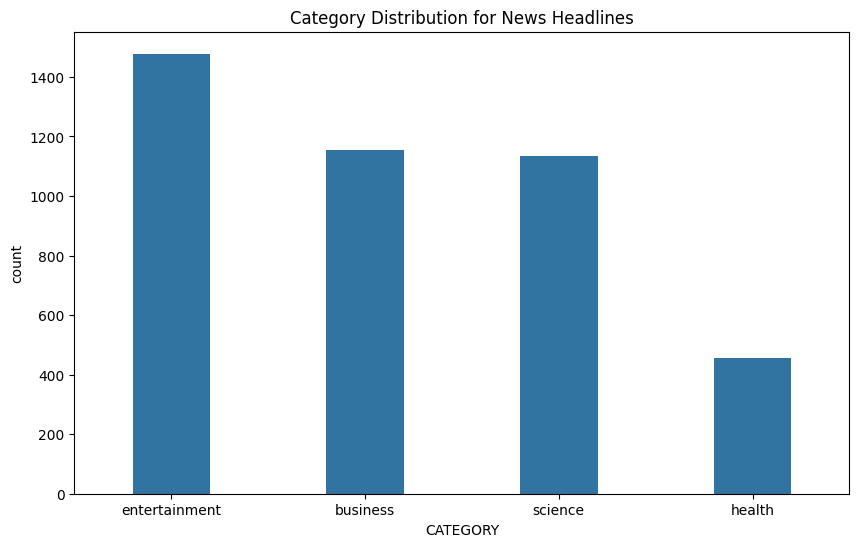

In [ ]:
# Define your mapping
categories = df['CATEGORY'].value_counts().index.values
category_map = {'m': 'health', 'b': 'business', 'e': 'entertainment', 't': 'science'}

plt.figure(figsize=(10, 6))
sns.countplot(df, x='CATEGORY', order=categories, width=.4)
plt.title('Category Distribution for News Headlines')
# Replace x-axis labels
plt.xticks(ticks=range(len(categories)), labels=[category_map[cat] for cat in categories])

plt.show()

In [ ]:
"""
cat_dict = {
    'b': 'business',
    't': 'science',
    'm': 'health',
    'e': 'entertainment',
}

df['CATEGORY'].apply(lambda x: cat_dict[x])
""";

In [ ]:
def get_random_headline_by_category(news_category):
    """Return a sample headline from the given category."""
    return df.query("CATEGORY == @news_category").sample()['TITLE'].values[0]

In [ ]:
print('Sample headlines from the **health** category:\n')
for i in range(10):
    print(f'{i}: {get_random_headline_by_category("m")}')

Sample headlines from the **health** category:

0: Minnesota woman who lost husband to Ebola urges aid to fight virus
1: Study Measures Health Lifestyles of Gays, Lesbians, Bisexuals
2: Polluted air linked to seven million deaths in 2012 - WHO
3: VIRAL VIDEO: Mailman Battles Angry Cat
4: FDA panel backs MannKind Corp.'s diabetes drug Afrezza
5: Sierra Leone declares state of emergency as Ebola spreads
6: One in three dementia cases can be prevented
7: 3D-printed medical device rescues baby's breath
8: Recalled Chicken Sold in Idaho
9: Ebola crisis in West Africa deepens; 500-plus dead


In [ ]:
print('Sample headlines from the **entertainment** category:\n')
for i in range(10):
    print(f'{i}: {get_random_headline_by_category("e")}')

Sample headlines from the **entertainment** category:

0: Khloe Kardashian's 30th Birthday Is Pretty Freaking Awesome
1: 'Avatar' Director James Cameron Talks Next Three 'Avatar' Movies
2: Miley Cyrus Wonders: Will I Ever Love Again?
3: Lana Del Rey Tweets Angry Response to Death Wish Quotes, Forgets How the  ...
4: Hotel investigates video leak of apparent Jay Z family feud
5: Will Queen Bey reign supreme? Beyonce leads MTV Video Music Awards with  ...
6: CBS Announces a Premiere Date for Stalker
7: Watch! The Killing final season trailer
8: Dismissed New York Times editor at Wake Forest graduation: Leading  ...
9: Seinfeld, No. 14 in Its Debut Season, Would Beat Every Show But One Today


In [ ]:
# Check all the headlines with the `citigroup` in them (case insensitive.)
df.query("TITLE.str.contains('citigroup', case=False, na=False)")


,TITLE,CATEGORY,PUBLISHER,HOSTNAME
282,Citigroup likely to pay $7b to resolve US probe,b,Oman Tribune,www.omantribune.com
1553,NY to get $182M in Citigroup settlement,b,WGRZ-TV,www.wgrz.com
2077,"Stocks Rise on Earnings Optimism as Citigroup,...",b,Moneynews,www.moneynews.com
3243,Citigroup may pay $7bn settlement,b,Peninsula On-line,thepeninsulaqatar.com
3258,Stocks head up again after Citigroup agreement,b,Columbus Dispatch,www.dispatch.com
3890,Mortgage Settlement Hits Citigroup Net Income,b,ABC News,abcnews.go.com
4197,Business update: Citigroup to pay $7B in subpr...,b,MPNnow.com,www.mpnnow.com


In [ ]:
# felony, lifelong ...
df[df['TITLE'].str.contains('elon', case=False, na=False)]

,TITLE,CATEGORY,PUBLISHER,HOSTNAME
298,District attorney rejects felony case in Biebe...,e,Minneapolis Star Tribune,www.startribune.com
841,Elon Musk Brings Solar Energy To Horizon After...,b,CrazyEngineers,www.crazyengineers.com
1776,Working with Depp was lifelong ambition: Freeman,e,Business Standard,www.business-standard.com
2323,"Exelon to buy Del., A.C. power cos. in $7B deal",b,Philly.com \(blog\),www.philly.com
2402,VIDEO: Two Planes Narrowly Avoid a Catastrophi...,b,RYOT,www.ryot.org
2878,Video: two planes in 'near miss' at Barcelona ...,b,euronews,www.euronews.com
3383,Miley Cyrus Flaunts Her Bikini Body Poolside i...,e,Just Jared Jr.,www.justjaredjr.com
4167,"Elon Musk Promised a ""Cool Thing"" for Tesla Ro...",b,Complex.com,www.complex.com


In [ ]:
df[df['TITLE'].str.contains('Elon', case=True, na=False)]

,TITLE,CATEGORY,PUBLISHER,HOSTNAME
841,Elon Musk Brings Solar Energy To Horizon After...,b,CrazyEngineers,www.crazyengineers.com
4167,"Elon Musk Promised a ""Cool Thing"" for Tesla Ro...",b,Complex.com,www.complex.com
